In [77]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np


n_qubits = 3 # number of qubits
solutions = np.array([[0,1,1], [1,0,1]])
n_iterations = 1 # number of iterations

# n_iterations = int(np.round(np.sqrt(2**n_qubits / len(solutions)) * np.pi/4))

################################################################################
def oracle(wires, solutions):
    qml.FlipSign(solutions, wires=wires)

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def GroverSearch_circuit(n_qubits, solutions, n_iterations=1):

    n_solutions = len(solutions) # number of solutions
    wires = list(range(n_qubits))


    # initial state
    for wire in wires:
        qml.Hadamard(wires=wire)

    # Grover's iterator
    for i in range(n_iterations):
        for s in solutions:
            oracle(wires, s)
        qml.templates.GroverOperator(wires)

    return qml.probs(wires=wires)


results = qml.snapshots(GroverSearch_circuit)(n_qubits, solutions, n_iterations)['execution_results']

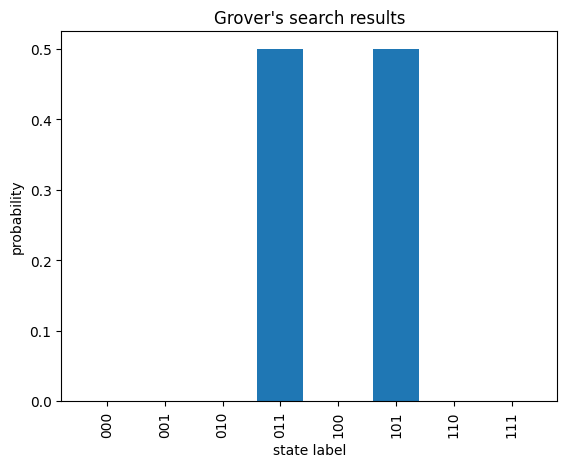

In [78]:
bit_strings = [f"{i:0{n_qubits}b}" for i in range(len(results))]

plt.bar(bit_strings, results)

plt.xticks(rotation='vertical')
plt.xlabel('state label')
plt.ylabel("probability")
plt.title("Grover's search results")

plt.show()

n_iterations=  4


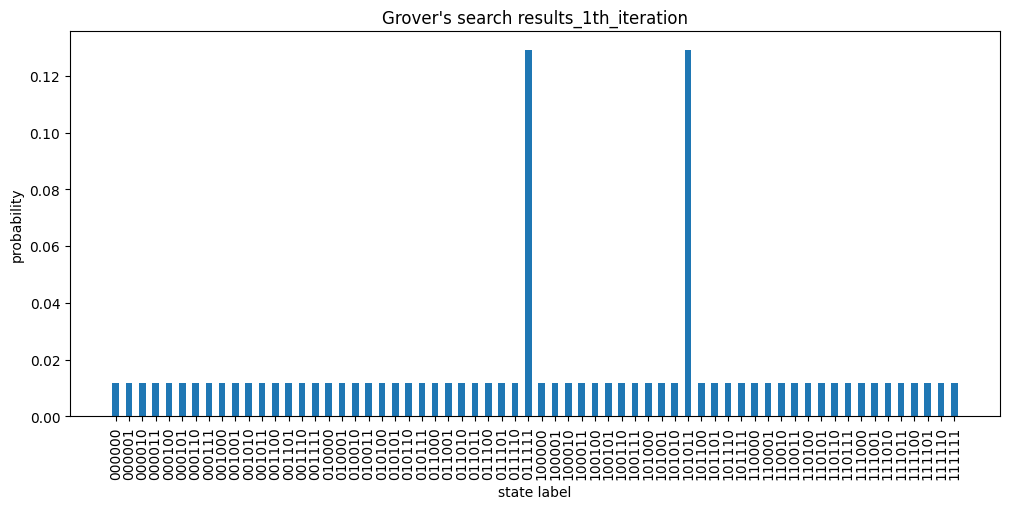

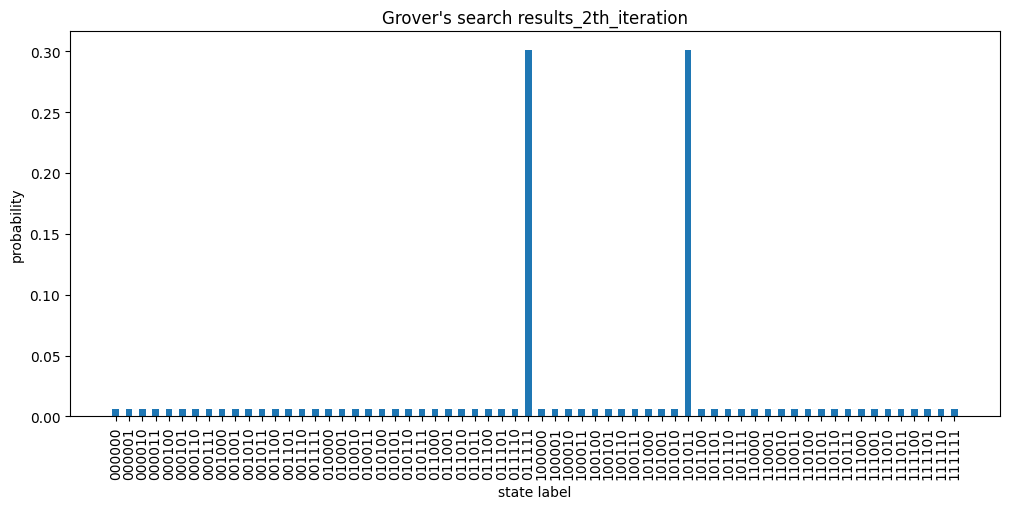

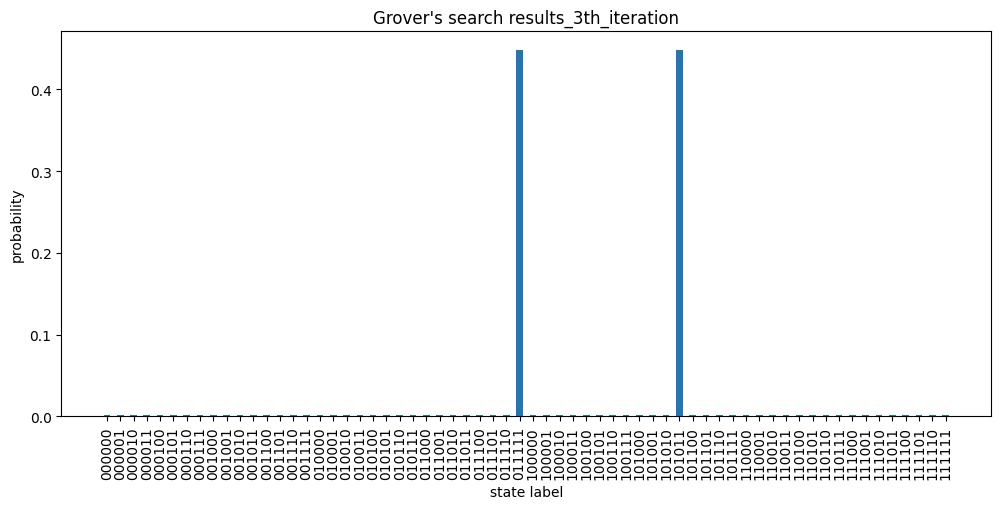

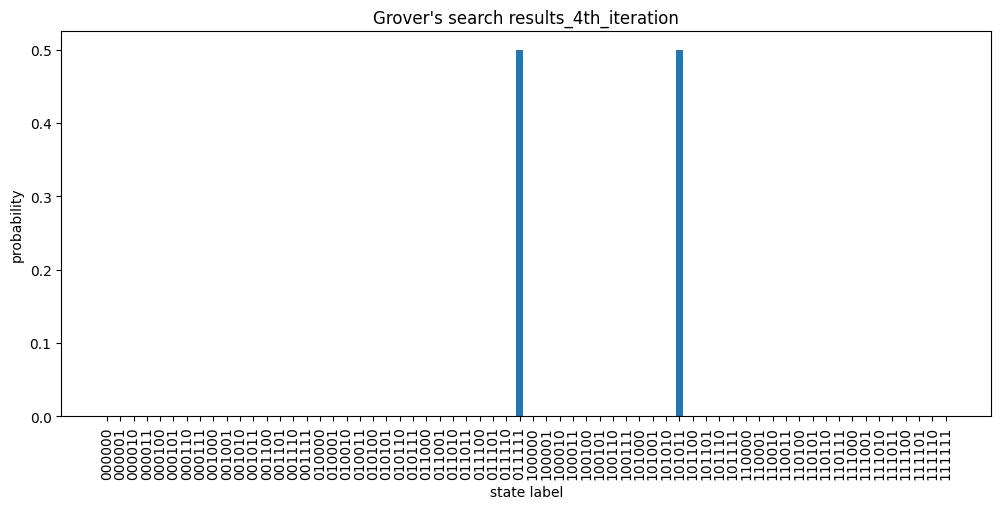

In [110]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np


n_qubits=6 # number of qubits
solutions = np.array([[0,1,1,1,1,1], [1,0,1,0,1,1]])

n_iterations = int(np.round(np.sqrt(2**n_qubits / len(solutions)) * np.pi/4))
print('n_iterations= ', n_iterations)

################################################################################
def oracle(wires, solutions):
    qml.FlipSign(solutions, wires=wires)

@qml.qnode(dev)
def GroverSearch_circuit(n_qubits, solutions, n_iterations=1):

    n_solutions = len(solutions) # number of solutions
    wires = list(range(n_qubits))


    # initial state
    for wire in wires:
        qml.Hadamard(wires=wire)

    # Grover's iterator
    for i in range(n_iterations):
        for s in solutions:
            oracle(wires, s)
        qml.templates.GroverOperator(wires)

    return qml.probs(wires=wires)


for i in range(1, n_iterations+1):
    results=qml.snapshots(GroverSearch_circuit)(n_qubits, solutions, n_iterations=i)['execution_results']

    # plot results
    bit_strings = [f"{i:0{n_qubits}b}" for i in range(len(results))]
    fig = plt.figure(figsize = (12, 5))
    plt.bar(bit_strings, results, width = 0.5)
    plt.xticks(rotation='vertical')
    plt.xlabel('state label')
    plt.ylabel("probability")
    plt.title("Grover's search results_{}th_iteration".format(i))